In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Model
from keras.layers import Dense,Input,Conv2D,UpSampling2D,MaxPooling2D
from keras.optimizers import Adam
from keras.datasets import mnist
from tensorflow.keras.regularizers import l1,l2

In [ ]:
(xtrain,ytrain),(xtest,ytest) = mnist.load_data()

In [ ]:
xtrain = xtrain/255
xtest = xtest/255

In [ ]:
xtrain.shape

(60000, 28, 28)

In [ ]:
h = 28
w = 28
c = 1

In [ ]:
xtrain.shape,xtest.shape

((60000, 28, 28), (10000, 28, 28))

In [ ]:
h, w, c = 28,28,1 # Update these values with your actual dimensions
latent_dim = 64
latent_dim2 = 32
latent_dim3 = 16
#Encoder
inputs = Input(shape=(h ,w ,c))
conv1 = Conv2D(32,(3,3),activation = 'relu',padding = 'same')(inputs)
pool1 = MaxPooling2D(pool_size = (2,2))(conv1)
conv2 = Conv2D(64,(3,3),activation ='relu',padding = "same")(pool1)
pool2 = MaxPooling2D(pool_size = (2,2))(conv2)
conv3 = Conv2D(128,(3,3),activation = "relu",padding = 'same')(pool2)

#decoder
conv4 = Conv2D(128,(3,3),activation = "relu",padding = "same")(conv3)
upsample1 = UpSampling2D((2,2))(conv4)
conv5 = Conv2D(64,(3,3),activation = 'relu',padding = "same")(upsample1)
upsample2 = UpSampling2D((2,2))(conv5)
conv6 = Conv2D(32,(3,3),activation = "relu",padding = "same")(upsample2)
output = Conv2D(1,(3,3),activation = "sigmoid",padding = "same")(conv6)

autoencoder = Model(inputs, output)
autoencoder.compile(optimizer = Adam(1e-3),loss = "binary_crossentropy")
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_7 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 7, 7, 128)         7385

In [ ]:
hist = autoencoder.fit(xtrain,xtrain,epochs =32,batch_size = 50,validation_data = (xtest,xtest))

Epoch 1/32
1200/1200 [==============================] - 22s 8ms/step - loss: 0.0799 - val_loss: 0.0663
Epoch 2/32
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0658 - val_loss: 0.0646
Epoch 3/32
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0644 - val_loss: 0.0634
Epoch 4/32
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0636 - val_loss: 0.0629
Epoch 5/32
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0631 - val_loss: 0.0626
Epoch 6/32
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0626 - val_loss: 0.0621
Epoch 7/32
1200/1200 [==============================] - 10s 8ms/step - loss: 0.0622 - val_loss: 0.0617
Epoch 8/32
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0620 - val_loss: 0.0615
Epoch 9/32
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0617 - val_loss: 0.0612
Epoch 10/32
1200/1200 [==============================] - 9s 8ms/step - loss: 0.0

In [ ]:
xtest_pred = autoencoder.predict(xtest)

313/313 [==============================] - 1s 3ms/step


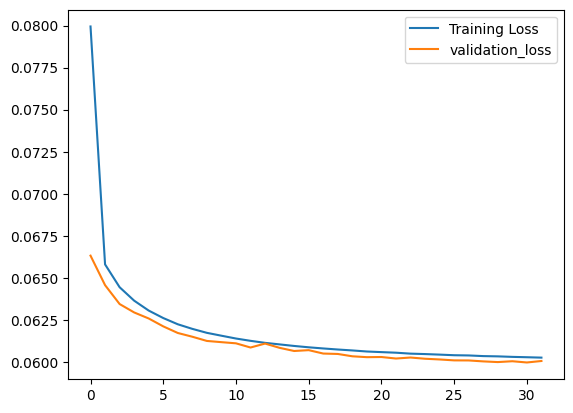

In [ ]:
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="validation_loss")
plt.legend()

In [ ]:
n=10 ## how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
  ## display original
  ax = plt.subplot(2, n, i + 1)
  ax.set_title("Original Image")
  plt.imshow(xtest[i].reshape(h,w,c))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  ## display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  ax.set_title("Predicted Image")
  plt.imshow(xtest_pred[i].reshape(h, w,c))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("simple_autoencoder.png")

Noise adding to the image

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_45 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 14, 14, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_46 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_47 (Conv2D)          (None, 7, 7, 128)         7385

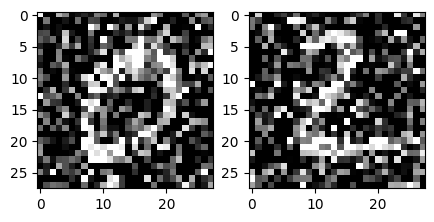

In [ ]:
noise_factor=0.5
x_train_noisy = xtrain + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=xtrain.shape)

x_test_noisy = xtest + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=xtest.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)

x_test_noisy = np.clip(x_test_noisy, 0., 1.)

plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
curr_img=np.reshape(x_train_noisy[1],(28,28))
plt.imshow(curr_img,cmap='gray')
# Display the first image in testing data
plt.subplot(122)
curr_img=np.reshape(x_test_noisy[1],(28,28))
plt.imshow(curr_img,cmap='gray')


H=28
W=28
C=1
#encoder
#input = 28 x 28 x 1 (wide and thin)
inputs =Input (shape=(H,W,C))
conv1= Conv2D(32, (3, 3), activation='relu', padding='same') (inputs) #28 x 28 x 32
pool1 =MaxPooling2D(pool_size=(2, 2)) (conv1) #14 x 14 x 32
conv2 =Conv2D(64, (3, 3), activation='relu', padding='same') (pool1) #14 x 14 x 64
pool2 = MaxPooling2D(pool_size=(2, 2)) (conv2) #7 x 7 x 64
conv3 = Conv2D(128, (3, 3), activation ='relu', padding='same') (pool2) #7 x 7 x 128 (small and thick)
#decoder
conv4 = Conv2D(128, (3, 3), activation ='relu', padding='same') (conv3) #7 x 7 x 128
up1 = UpSampling2D((2,2)) (conv4) # 14 x 14 x 128
conv5 = Conv2D(64, (3, 3), activation ='relu', padding='same') (up1) # 14 x 14 x 64
up2 = UpSampling2D((2,2)) (conv5) # 28 x 28 x 64
conv6 = Conv2D(32, (3, 3), activation ='relu', padding='same') (up2) # 28 x 28 x 32

outputs = Conv2D(1, (3, 3), activation='sigmoid', padding='same') (conv6) # 28 x 28 x 1

autoencoder = Model(inputs, outputs)
autoencoder.compile(optimizer=Adam (1e-3), loss='binary_crossentropy')
autoencoder.summary()




In [ ]:
## Training the autoencoder
autoencoder.fit(x_train_noisy,xtrain,epochs=15,batch_size=64,shuffle=False,validation_data=(x_test_noisy, xtest))

Epoch 1/15
938/938 [==============================] - 12s 10ms/step - loss: 0.1233 - val_loss: 0.1080
Epoch 2/15
938/938 [==============================] - 9s 9ms/step - loss: 0.0981 - val_loss: 0.1056
Epoch 3/15
938/938 [==============================] - 9s 10ms/step - loss: 0.0954 - val_loss: 0.1023
Epoch 4/15
938/938 [==============================] - 9s 10ms/step - loss: 0.0939 - val_loss: 0.0967
Epoch 5/15
938/938 [==============================] - 9s 9ms/step - loss: 0.0930 - val_loss: 0.0948
Epoch 6/15
938/938 [==============================] - 9s 10ms/step - loss: 0.0920 - val_loss: 0.0938
Epoch 7/15
938/938 [==============================] - 9s 10ms/step - loss: 0.0914 - val_loss: 0.0933
Epoch 8/15
938/938 [==============================] - 9s 9ms/step - loss: 0.0909 - val_loss: 0.0926
Epoch 9/15
938/938 [==============================] - 9s 10ms/step - loss: 0.0904 - val_loss: 0.0928
Epoch 10/15
938/938 [==============================] - 9s 10ms/step - loss: 0.0900 - val_loss

In [ ]:
plt.plot(hist.history["loss"],label="Training Loss")
plt.plot(hist.history["val_loss"],label="validation_loss")
plt.legend()

313/313 [==============================] - 1s 3ms/step


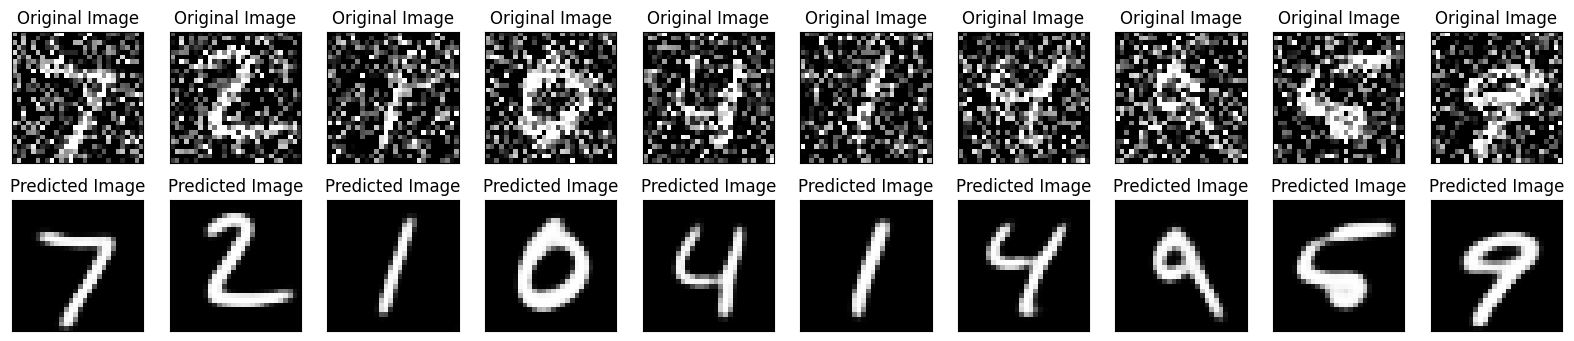

In [ ]:
test_pred_y = autoencoder.predict(xtest)
n=10 # how many digits we will display
plt.figure(figsize=(20,4))
for i in range(n):
  # display original
  ax=plt.subplot(2,n,i+1)
  ax.set_title("Original Image")
  plt.imshow(x_test_noisy[i].reshape(H, W))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ## display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  ax.set_title("Predicted Image")
  plt.imshow(test_pred_y[i].reshape(H, W))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.savefig("deep_autoencoder.png")